# Name: Nisrin Dhoondia  

# Email: nisrin.dhoondia@gmail.com  

# LinkedIn: https://www.linkedin.com/in/nisrin-dhoondia-javadeveloper/  



# Analytics Vidhya - Job-a-Thon  

# Health Insurance Lead Prediction  

Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. **When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.**

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

  * Demographics (city, age, region etc.)  
  * Information regarding holding policies of the customer  
  * Recommended Policy Information

## Data Dictionary  

## Train Data  

|Variable|Definition|
|:----|:----|
|ID|Unique Identifier for a row|
|City_Code|Code for the City of the customers|
|Region_Code|Code for the Region of the customers|
|Accomodation_Type|Customer Owns or Rents the house|
|Reco_Insurance_Type|Joint or Individual type for the recommended insurance|
|Upper_Age|Maximum age of the customer|
|Lower _Age|Minimum age of the customer|
|Is_Spouse|If the customers are married to each other (in case of joint insurance)|
|Health_Indicator|Encoded values for health of the customer|
|Holding_Policy_Duration|Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)|
|Holding_Policy_Type|Type of holding policy|
|Reco_Policy_Cat|Encoded value for recommended health insurance|
|Reco_Policy_Premium|Annual Premium (INR) for the recommended health insurance|
|Response (Target)|	0 : Customer did not show interest in the recommended policy, 1 : Customer showed interest in the recommended policy|

## Test Data  
|Variable|Definition|
|:----|:----|
|ID|Unique Identifier for a row|
|City_Code|Code for the City of the customers|
|Region_Code|Code for the Region of the customers|
|Accomodation_Type|Customer Owns or Rents the house|
|Reco_Insurance_Type|Joint or Individual type for the recommended insurance|
|Upper_Age|Maximum age of the customer|
|Lower _Age|Minimum age of the customer|
|Is_Spouse|If the customers are married to each other (in case of joint insurance)|
|Health_Indicator|Encoded values for health of the customer|
|Holding_Policy_Duration|Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)|
|Holding_Policy_Type|Type of holding policy|
|Reco_Policy_Cat|Encoded value for recommended health insurance|
|Reco_Policy_Premium|Annual Premium (INR) for the recommended health insurance|




# Loading the Dataset
# Analyzing the Data 
# Data Preprocessing

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer


import warnings
warnings.filterwarnings('ignore')

In [2]:
# uploading csv file for accessing it in this notebook
from google.colab import files
uploaded = files.upload()

Saving test_healthinsurance.csv to test_healthinsurance.csv
Saving train_healthinsurance.csv to train_healthinsurance.csv


In [3]:
# reading csv files and assigning to the variable for accessing
df_healthinsurance = pd.read_csv('train_healthinsurance.csv',)
dftest_healthinsurance = pd.read_csv('test_healthinsurance.csv')

In [4]:
# first 5 rows content of the dataset
df_healthinsurance.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
# last 5 rows content of the dataset
df_healthinsurance.tail()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1
50881,50882,C3,3866,Rented,Individual,24,24,No,X3,2.0,3.0,18,11424.0,0


In [6]:
# first 5 rows content of the test dataset
dftest_healthinsurance.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [7]:
# last 5 rows content of the dataset
dftest_healthinsurance.tail()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0
21804,72687,C2,3617,Owned,Individual,73,73,No,X2,14+,2.0,3,23040.0


In [8]:
# getting all the columns name of the dataset
df_healthinsurance.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [9]:
# changing Health Indicator column name to Health_Indicator for consistency
df_healthinsurance.rename(columns={'Health Indicator' : 'Health_Indicator'}, inplace = True)

In [10]:
# getting all the columns name of the test dataset
dftest_healthinsurance.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

In [11]:
# changing Health Indicator column name to Health_Indicator for consistency in test dataset
dftest_healthinsurance.rename(columns={'Health Indicator' : 'Health_Indicator'}, inplace = True)

In [12]:
# getting brief overview of the dataset - number of columns and rows (shape of dataset), 
# columns names and its dtype, 
# how many non-null values it has 
# and memory usage
df_healthinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health_Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [13]:
# getting brief overview of the dataset - number of columns and rows (shape of dataset), 
# columns names and its dtype, 
# how many non-null values it has 
# and memory usage
dftest_healthinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health_Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [14]:
# shape of the dataset
df_healthinsurance.shape, dftest_healthinsurance.shape

((50882, 14), (21805, 13))

In [15]:
# target column (dependent variable) all unique values count in percentage
round(df_healthinsurance['Response'].value_counts(normalize = True) * 100, 2)

0    76.01
1    23.99
Name: Response, dtype: float64

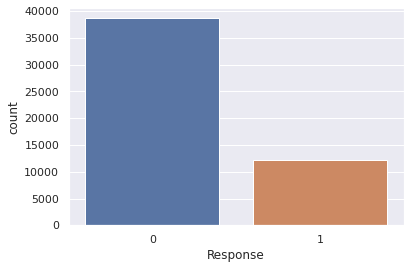

In [16]:
# visualization of dependant variable imbalance in the dataset
sns.set(style = 'darkgrid')
sns.countplot(x = 'Response', data = df_healthinsurance)
plt.show()

In [17]:
# checking for any duplicate records
df_healthinsurance.duplicated().sum()

0

In [18]:
# checking for any duplicate records in test dataset too
dftest_healthinsurance.duplicated().sum()

0

In [19]:
# checking for null values in dataset
df_healthinsurance.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health_Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [20]:
# checking for null values in test dataset
dftest_healthinsurance.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health_Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

### Filling the NaN values
Finding the uniques values and its counts along with null value count in all the three columns that are having null values

In [21]:
df_healthinsurance['Health_Indicator'].value_counts(dropna = False)

X1     13010
NaN    11691
X2     10332
X3      6762
X4      5743
X5      1727
X6      1280
X7       196
X8        78
X9        63
Name: Health_Indicator, dtype: int64

In [22]:
dftest_healthinsurance['Health_Indicator'].value_counts(dropna = False)

X1     5614
NaN    5027
X2     4516
X3     2846
X4     2442
X5      681
X6      514
X7       96
X8       41
X9       28
Name: Health_Indicator, dtype: int64

In [23]:
df_healthinsurance['Holding_Policy_Duration'].value_counts(dropna = False)

NaN     20251
1.0      4499
14+      4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

In [24]:
dftest_healthinsurance['Holding_Policy_Duration'].value_counts(dropna = False)

NaN     8603
14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64

In [25]:
df_healthinsurance['Holding_Policy_Type'].value_counts(dropna = False)

NaN    20251
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [26]:
df_healthinsurance['Holding_Policy_Type'].describe()

count    30631.000000
mean         2.439228
std          1.025923
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: Holding_Policy_Type, dtype: float64

In [27]:
dftest_healthinsurance['Holding_Policy_Type'].value_counts(dropna = False)

NaN    8603
3.0    5572
1.0    3574
2.0    2150
4.0    1906
Name: Holding_Policy_Type, dtype: int64

In [28]:
dftest_healthinsurance['Holding_Policy_Type'].describe()

count    13202.000000
mean         2.440085
std          1.037627
min          1.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: Holding_Policy_Type, dtype: float64

Filling the null values in Health_Indicator and Holding_Policy_Duration columns using SimpleImputer with most frequent strategy and also for Holding_Policy_Type using mode.  

Used mode in Holding_Policy_Type because people go with policy which is most popular and same goes for Holding_Policy_Duration. For Health_Indicator used most frequent strategy too as most of the policy holder are at same health level mostly.



In [29]:
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_healthinsurance['Health_Indicator'] = impute.fit_transform(df_healthinsurance[['Health_Indicator']])
df_healthinsurance['Holding_Policy_Duration'] = impute.fit_transform(df_healthinsurance[['Holding_Policy_Duration']])
dftest_healthinsurance['Health_Indicator'] = impute.fit_transform(dftest_healthinsurance[['Health_Indicator']])
dftest_healthinsurance['Holding_Policy_Duration'] = impute.fit_transform(dftest_healthinsurance[['Holding_Policy_Duration']])

In [30]:
df_healthinsurance.loc[(df_healthinsurance['Holding_Policy_Type'].isnull()),'Holding_Policy_Type'] = df_healthinsurance['Holding_Policy_Type'].mode()[0]
dftest_healthinsurance.loc[(dftest_healthinsurance['Holding_Policy_Type'].isnull()),'Holding_Policy_Type'] = dftest_healthinsurance['Holding_Policy_Type'].mode()[0]

Rechecking the dataset after filling all the null values in it

In [31]:
df_healthinsurance.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [32]:
dftest_healthinsurance.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health_Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

### Converting object dtype columns to numeric dtype

In [33]:
# getting all object dtype columns name
objectcol_list = list(df_healthinsurance.select_dtypes(['object']).columns)
objectcol_list

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health_Indicator',
 'Holding_Policy_Duration']

Finding the unique values and also checking whether the unique values are same in train and test dataset. As while converting object dtype to numeric dtype if both the train and test dataset doesn't have same unique values it will create a discrepancy in these columns values which may affect the prediction results of the model. Though these dataset has same unique values in each of the object dtype columns in both train and test, then though I had combined both train and test to perform the conversion of object dtype to numeric dtype using astype('category').cat.codes as this doesnot create extra columns like get_dummies. Later again separated train and test dataset.

In [34]:
df_healthinsurance['City_Code'].value_counts().sort_index()

C1     8973
C10    1611
C11    1147
C12     868
C13    1005
C14     746
C15    1186
C16    1135
C17    1159
C18     797
C19     899
C2     7747
C20     926
C21     679
C22     516
C23     587
C24     553
C25     366
C26     499
C27     295
C28     285
C29     387
C3     4889
C30      58
C31      15
C32     160
C33     286
C34     130
C35      56
C36      36
C4     3671
C5     1364
C6     1950
C7     1910
C8     1806
C9     2185
Name: City_Code, dtype: int64

In [35]:
df_healthinsurance['City_Code'].value_counts().sort_index().index.tolist() == dftest_healthinsurance['City_Code'].value_counts().sort_index().index.tolist()

True

In [36]:
df_healthinsurance['Accomodation_Type'].value_counts().sort_index()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [37]:
df_healthinsurance['Accomodation_Type'].value_counts().sort_index().index.tolist() == dftest_healthinsurance['Accomodation_Type'].value_counts().sort_index().index.tolist()

True

In [38]:
df_healthinsurance['Reco_Insurance_Type'].value_counts().sort_index()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [39]:
df_healthinsurance['Reco_Insurance_Type'].value_counts().sort_index().index.tolist() == dftest_healthinsurance['Reco_Insurance_Type'].value_counts().sort_index().index.tolist()

True

In [40]:
df_healthinsurance['Is_Spouse'].value_counts().sort_index()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [41]:
df_healthinsurance['Is_Spouse'].value_counts().sort_index().index.tolist() == dftest_healthinsurance['Is_Spouse'].value_counts().sort_index().index.tolist()

True

In [42]:
df_healthinsurance['Health_Indicator'].value_counts().sort_index()

X1    24701
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health_Indicator, dtype: int64

In [43]:
df_healthinsurance['Health_Indicator'].value_counts().sort_index().index.tolist() == dftest_healthinsurance['Health_Indicator'].value_counts().sort_index().index.tolist()

True

In [44]:
df_healthinsurance['Holding_Policy_Duration'].value_counts().sort_index()

1.0     24750
10.0      813
11.0      546
12.0      513
13.0      511
14+      4335
14.0      466
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
Name: Holding_Policy_Duration, dtype: int64

In [45]:
df_healthinsurance['Holding_Policy_Duration'].value_counts().sort_index().index.tolist() == dftest_healthinsurance['Holding_Policy_Duration'].value_counts().sort_index().index.tolist()

True

In [46]:
df_healthinsurance['Training_Dataset']  = 1
dftest_healthinsurance['Training_Dataset']  = 0
tempcombine_df = pd.concat([df_healthinsurance,dftest_healthinsurance])
tempcombine_df.reset_index(drop = True, inplace = True)

In [47]:
tempcombine_df['City_Code'] = tempcombine_df['City_Code'].astype('category').cat.codes
tempcombine_df['Accomodation_Type'] = tempcombine_df['Accomodation_Type'].astype('category').cat.codes
tempcombine_df['Reco_Insurance_Type'] = tempcombine_df['Reco_Insurance_Type'].astype('category').cat.codes
tempcombine_df['Is_Spouse'] = tempcombine_df['Is_Spouse'].astype('category').cat.codes
tempcombine_df['Health_Indicator'] = tempcombine_df['Health_Indicator'].astype('category').cat.codes
tempcombine_df['Holding_Policy_Duration'] = tempcombine_df['Holding_Policy_Duration'].astype('category').cat.codes

In [48]:
df_healthinsurance = tempcombine_df[tempcombine_df['Training_Dataset']  == 1]
df_healthinsurance.drop(['Training_Dataset'], axis = 1, inplace = True)
df_healthinsurance.reset_index(drop = True, inplace = True)

In [49]:
dftest_healthinsurance = tempcombine_df[tempcombine_df['Training_Dataset']  == 0]
dftest_healthinsurance.drop(['Training_Dataset', 'Response'], axis = 1, inplace = True)
dftest_healthinsurance.reset_index(drop = True, inplace = True)

### Feature engineering 

In [50]:
# finding the mean of the values in each of the Upper_Age and  Lower_Age columns datapoints (row-wise) 
# that is mean of upper age and lower age at row 0 index for 0 index row datapoint in Mean_Age column and so on. 
df_healthinsurance['Mean_Age'] = [np.mean([val['Upper_Age'], val['Lower_Age']]) for idx, val in df_healthinsurance.iterrows()] 
dftest_healthinsurance['Mean_Age'] = [np.mean([val['Upper_Age'], val['Lower_Age']]) for idx, val in dftest_healthinsurance.iterrows()] 

# removing ID column as it is not important independent feature for the dependent feature
# removing Upper_Age and  Lower_Age column as we have mean of each of the two columns datapoints in Mean_Age column
temptestdf = dftest_healthinsurance.copy() # making a copy to get the index and ID for the predction submission file
df_healthinsurance.drop(['ID','Upper_Age', 'Lower_Age'], axis = 1, inplace =True)
dftest_healthinsurance.drop(['ID','Upper_Age', 'Lower_Age'], axis = 1, inplace =True)

In [51]:
# getting brief overview of the dataset column dtype
df_healthinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  int8   
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  int8   
 3   Reco_Insurance_Type      50882 non-null  int8   
 4   Is_Spouse                50882 non-null  int8   
 5   Health_Indicator         50882 non-null  int8   
 6   Holding_Policy_Duration  50882 non-null  int8   
 7   Holding_Policy_Type      50882 non-null  float64
 8   Reco_Policy_Cat          50882 non-null  int64  
 9   Reco_Policy_Premium      50882 non-null  float64
 10  Response                 50882 non-null  float64
 11  Mean_Age                 50882 non-null  float64
dtypes: float64(4), int64(2), int8(6)
memory usage: 2.6 MB


In [52]:
# getting brief overview of the dataset column dtype
dftest_healthinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  int8   
 1   Region_Code              21805 non-null  int64  
 2   Accomodation_Type        21805 non-null  int8   
 3   Reco_Insurance_Type      21805 non-null  int8   
 4   Is_Spouse                21805 non-null  int8   
 5   Health_Indicator         21805 non-null  int8   
 6   Holding_Policy_Duration  21805 non-null  int8   
 7   Holding_Policy_Type      21805 non-null  float64
 8   Reco_Policy_Cat          21805 non-null  int64  
 9   Reco_Policy_Premium      21805 non-null  float64
 10  Mean_Age                 21805 non-null  float64
dtypes: float64(3), int64(2), int8(6)
memory usage: 979.6 KB


In [53]:
# basic statistical details
df_healthinsurance.describe()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Mean_Age
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,14.974981,1732.788707,0.450670,0.203333,0.165520,1.112751,4.133171,2.662415,15.115188,14183.950069,0.239947,43.797571
std,12.147432,1424.081652,0.497566,0.402482,0.371653,1.406159,4.601652,0.841994,6.340663,6590.074873,0.427055,16.971142
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2280.000000,0.000000,17.500000
25%,4.000000,523.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,9248.000000,0.000000,28.000000
50%,11.000000,1391.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,17.000000,13178.000000,0.000000,42.000000
75%,30.000000,2667.000000,1.000000,0.000000,0.000000,2.000000,8.000000,3.000000,20.000000,18096.000000,0.000000,58.000000
max,35.000000,6194.000000,1.000000,1.000000,1.000000,8.000000,14.000000,4.000000,22.000000,43350.400000,1.000000,75.000000


In [54]:
# basic statistical details
dftest_healthinsurance.describe()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Mean_Age
count,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000,21805.000000
mean,14.889750,1748.737491,0.445540,0.204724,0.164091,1.096767,6.157808,2.660995,15.138363,14220.306581,43.812910
std,12.091854,1438.358949,0.497037,0.403509,0.370366,1.398623,3.275199,0.852497,6.302805,6497.996164,16.916164
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2152.000000,18.000000
25%,4.000000,535.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,12.000000,9285.000000,28.000000
50%,11.000000,1392.000000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,17.000000,13244.000000,42.000000
75%,29.000000,2712.000000,1.000000,0.000000,0.000000,2.000000,8.000000,3.000000,20.000000,18201.600000,58.000000
max,35.000000,6185.000000,1.000000,1.000000,1.000000,8.000000,14.000000,4.000000,22.000000,43776.000000,75.000000


### Balancing the dataset dependent variable

In [55]:
# list of independent features
colname = list(df_healthinsurance.columns)
colname.remove('Response')
colname

['City_Code',
 'Region_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health_Indicator',
 'Holding_Policy_Duration',
 'Holding_Policy_Type',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Mean_Age']

In [56]:
# Synthetic Minority Oversampling Technique (SMOTE)
# We have to first split the train dataset into train and test datasets
# as we want to ensure that our model generalizes well to unseen data
# by avoiding having exact same observations to be present in both the test and train datasets after SMOTE
# but here in this competition I am using the entire train dataset to train the models so I am not splitting into train and test datasets.

X = df_healthinsurance.drop('Response', axis = 1)  # we will use the entire train datset in this competition
y = df_healthinsurance['Response']

from imblearn.over_sampling import SMOTE

func_smote = SMOTE(random_state = 5, sampling_strategy = 1.0) # 1 represents same number of each classes

#fit the sampling
X, y = func_smote.fit_sample(X, y)

#checking the result of SMOTE application
uniqueval, counts = np.unique(y, return_counts=True) 
balance_data = dict(zip(uniqueval, counts))
balance_data

{0.0: 38673, 1.0: 38673}

In [57]:
X.shape, y.shape

((77346, 11), (77346,))

### Normalizing the data

In [58]:
# normalizing the data with MinMaxScalar
minmaxdf_healthinsurance = X
minmax_scaler = MinMaxScaler()
minmaxdf_healthinsurance = minmax_scaler.fit_transform(minmaxdf_healthinsurance)
minmaxdf_healthinsurance = pd.DataFrame(minmaxdf_healthinsurance, columns = colname)
minmaxdf_healthinsurance['Response'] = y
minmaxdf_healthinsurance.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Mean_Age,Response
0,0.628571,0.518650,1.0,0.0,0.0,0.000,0.357143,0.666667,1.000000,0.227609,0.321739,0.0
1,0.885714,0.180203,0.0,1.0,0.0,0.125,0.000000,0.666667,1.000000,0.687356,0.539130,0.0
2,0.885714,0.602454,0.0,0.0,0.0,0.000,0.000000,0.000000,0.857143,0.125881,0.252174,1.0
3,0.457143,0.706766,0.0,1.0,0.0,0.000,0.357143,0.666667,0.857143,0.377401,0.565217,0.0
4,0.971429,0.353464,1.0,0.0,0.0,0.125,0.571429,0.000000,0.714286,0.197807,0.460870,0.0


In [59]:
minmaxdftest_healthinsurance = minmax_scaler.transform(dftest_healthinsurance)
minmaxdftest_healthinsurance = pd.DataFrame(minmaxdftest_healthinsurance, columns = colname)
minmaxdftest_healthinsurance.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Mean_Age
0,0.000000,0.025028,0.0,0.0,0.0,0.00,0.785714,0.666667,0.190476,0.235060,0.217391
1,0.857143,0.000969,0.0,1.0,1.0,0.00,0.571429,0.666667,0.809524,0.728622,0.886957
2,0.000000,0.090909,1.0,0.0,0.0,0.25,0.500000,1.000000,0.761905,0.169465,0.182609
3,0.628571,0.189892,1.0,0.0,0.0,0.25,0.571429,0.666667,0.809524,0.165715,0.095652
4,0.000000,0.153399,0.0,0.0,0.0,0.25,0.357143,0.666667,0.190476,0.493153,1.000000


### Finding the correlation and mean-relationship between independent variables and dependent variable

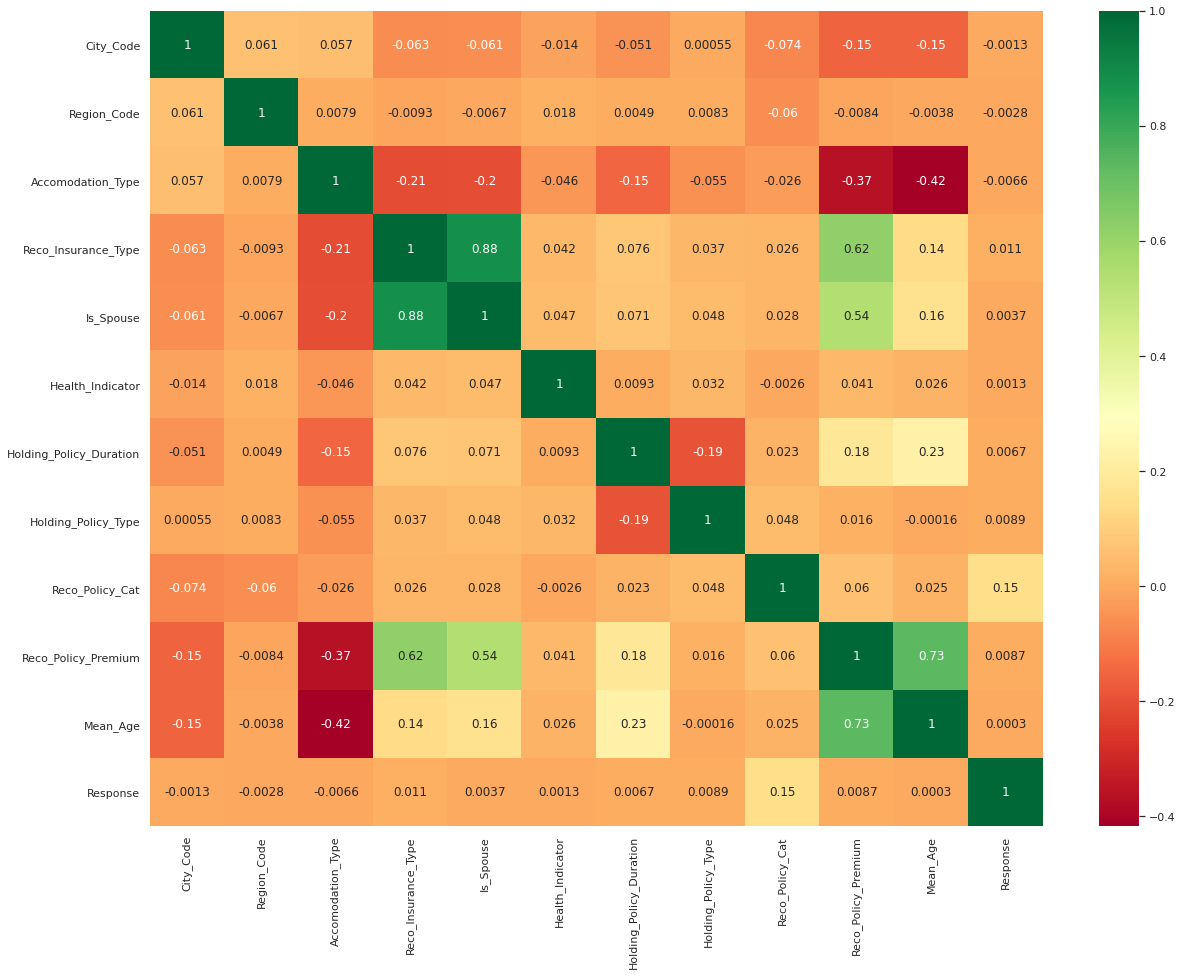

In [60]:
#finding the correlation between all the variables in a dataset
features_corr = minmaxdf_healthinsurance.corr()
plt.figure(figsize=(20,15))
sns.heatmap(features_corr, annot=True, cmap="RdYlGn")
plt.show()

In [61]:
#finding the mean relationship of independent variables with the dependent variable
minmaxdf_healthinsurance.groupby('Response').mean()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health_Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Mean_Age
Response,,,,,,,,,,,
0.0,0.427953,0.279492,0.452124,0.201096,0.164714,0.138873,0.294225,0.553159,0.652758,0.289126,0.457292
1.0,0.427086,0.278222,0.445853,0.209761,0.167364,0.139303,0.298368,0.557851,0.735217,0.291912,0.457467


### Separating the independent variables and dependent variable

In [62]:
# here in this competition I am using the entire dataset to train the models and not dividing it into train and test datasets.

In [63]:
#initializing the X (independent variables) and y (dependent variable)
X = minmaxdf_healthinsurance.drop('Response', axis = 1) 
y = minmaxdf_healthinsurance['Response']

# FirstModel  

# LogisticRegression  


In [64]:
from sklearn.linear_model import LogisticRegression

# creating the object of LogisticRegression model and assigning it to a variable
lr_model = LogisticRegression(max_iter=1000, random_state= 42)

# training the model
lr_model.fit(X,y)

# prediction of Response in test dataset
lrmodel_prediction = lr_model.predict(minmaxdftest_healthinsurance)

In [65]:
# creating a dataset of predicted output
lrmodel_result = pd.DataFrame(lrmodel_prediction)
lrmodel_result.index = temptestdf.index # its important for comparison
lrmodel_result.index = temptestdf['ID']
lrmodel_result.columns = ['Response']

# To download the csv file locally
from google.colab import files
lrmodel_result.to_csv('sample_submission_lrmodel.csv')         
files.download('sample_submission_lrmodel.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>